In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fig. 8

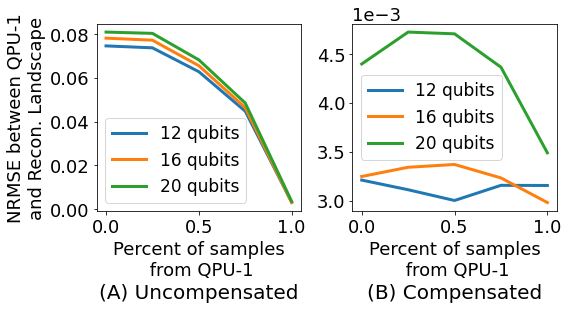

In [32]:
def one(ax, ratios, nqs, errors):

    for i in range(len(nqs)):
        # ax.plot(ratios, errors[i], label=f"{nqs[i]} qubits, {labels[0]}")
        ax.plot(ratios, errors[i], label=f"{nqs[i]} qubits", linewidth=3)
    # ax.set_xlabel("Percent of samples from low-noise landscape")
    # ax.set_ylabel("NRMSE between low-noise \nand recon. landscape")
    ax.legend()


def vis_compare_normalization(data1, data2, labels: list):
    # nqs = [12, 16, 20]
    # nqs = [12] #, 20]
    # nqs = [16] #, 20]
    params = {'legend.fontsize': 17,
          'figure.figsize': (8, 5),
         'axes.labelsize': 18, #'x-large',
         'axes.titlesize': 20, #'x-large',
         'xtick.labelsize': 18,
         'ytick.labelsize': 18}
    plt.rcParams.update(params)
    # fig = plt.figure(figsize=[6, 4])
    fig, axs = plt.subplots(nrows=1, ncols=2)
    errors1 = data1['errors1']
    errors2 = data2['errors1']
    ratios = data1['ratios']
    nqs = data1['n_qubits_list']

    one(axs[0], ratios, nqs, errors1)
    one(axs[1], ratios, nqs, errors2)
    
    axs[0].set_title("(A) Uncompensated", y=-0.5)
    axs[1].set_title("(B) Compensated", y=-0.5)
    axs[1].ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
    # axs[0].set_xlabel("Percent of samples from low-noise landscape")
    axs[0].set_xlabel("Percent of samples\n from QPU-1")
    axs[1].set_xlabel("Percent of samples\n from QPU-1")
        # ax.set_ylabel("NRMSE between low-noise \nand recon. landscape")
    # plt.ylabel("NRMSE between low-noise \nand recon. landscape")
    # fig.text(-0.08, 0.5, "NRMSE between low-noise and recon. landscape", va='center', rotation='vertical', fontsize=18)
    # fig.align_labels()
    axs[0].set_ylabel("NRMSE between QPU-1\nand Recon. Landscape")
    plt.tight_layout()
    plt.legend()
    fig.savefig("paper_figs/parallel_LS_recon_normalized.pdf", bbox_inches='tight', dpi=1000)
    plt.show()


def compare_recon_dist_with_normalize(method1: str, method2: str):
    # baseline
    def get_data(method):

        if method == 'baseline':
            path = "figs/recon_distributed_landscape/2022-11-20_19:52:35_OK/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=None-nf=0.000-error=NRMSE.npz"
            # path = "figs/recon_distributed_landscape/2022-11-13_16:48:42/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=None-nf=0.000-error=NRMSE.npz"
            # path = "figs/recon_distributed_landscape/2022-11-13_16:48:42/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=None-nf=0.000.npz"
        elif method == 'linear':
            path = "figs/recon_distributed_landscape/2022-11-20_19:49:11_OK/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=linear-nf=0.100-error=NRMSE.npz"
            # path = "figs/recon_distributed_landscape/2022-11-13_16:48:56/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=linear-nf=0.100-error=NRMSE.npz"
            # path = "figs/recon_distributed_landscape/2022-11-13_16:48:56/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=linear-nf=0.100.npz"
        elif method == 'geo':
            path = "figs/recon_distributed_landscape/2022-11-13_16:49:14_OK/dist_LS_errors-ns=[12, 16, 20]-p=1-r=[0.0, 0.25, 0.5, 0.75, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=geo-nf=0.100.npz"

        return np.load(path, allow_pickle=True)

    vis_compare_normalization(get_data(method1), get_data(method2), [method1, method2])

    return
    
# compare_recon_dist_with_normalize("baseline", "geo")
compare_recon_dist_with_normalize("baseline", "linear")
# compare_recon_dist_with_normalize("geo", "linear")

# Table V

In [33]:

def vis_in_one_refactor():
    params = [
        ['depolar-0.003-0.007', 'depolar-0.001-0.02',   
            'figs/recon_distributed_landscape/2023-02-20_19:13:26_OK/dist_LS_errors-ns=[20]-p=1-sf=0.200-r=[0.2, 0.5, 0.8, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=None-nf=0.200-error=NRMSE',
            'figs/recon_distributed_landscape/2023-02-20_18:59:55_OK/dist_LS_errors-ns=[20]-p=1-sf=0.200-r=[0.2, 0.5, 0.8, 1.0]-n1=depolar-0.003-0.007-n2=depolar-0.001-0.02-norm=linear-nf=0.200-error=NRMSE'],
        ['depolar-0.001-0.02', 'depolar-0.003-0.007',
            'figs/recon_distributed_landscape/2023-02-20_19:13:44_OK/dist_LS_errors-ns=[20]-p=1-sf=0.200-r=[0.2, 0.5, 0.8, 1.0]-n1=depolar-0.001-0.02-n2=depolar-0.003-0.007-norm=None-nf=0.200-error=NRMSE',
            'figs/recon_distributed_landscape/2023-02-20_19:00:03_OK/dist_LS_errors-ns=[20]-p=1-sf=0.200-r=[0.2, 0.5, 0.8, 1.0]-n1=depolar-0.001-0.02-n2=depolar-0.003-0.007-norm=linear-nf=0.200-error=NRMSE'],
        ['real_ibm_perth', 'ideal_ibm_perth',
            'figs/recon_distributed_landscape/2023-03-10_13:29:42_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=ideal_sim-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=None-nf=0.000-error=NRMSE',
            'figs/recon_distributed_landscape/2023-03-10_13:22:52_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=ideal_sim-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=linear-nf=0.200-error=NRMSE',
        ],
        ['real_ibm_perth', 'noisy_ibm_perth',
            'figs/recon_distributed_landscape/2023-03-10_13:30:11_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=noisy_sim-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=None-nf=0.000-error=NRMSE',
            'figs/recon_distributed_landscape/2023-03-10_13:30:01_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=noisy_sim-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=linear-nf=0.200-error=NRMSE',
        ],
        ['real_ibm_perth', 'real_ibm_lagos',
            'figs/recon_distributed_landscape/2023-03-10_13:45:31_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=real-m1=ibm_perth-m2=ibm_lagos-r=[0.2, 0.5, 0.8, 1.0]-norm=None-nf=0.000-error=NRMSE',
            'figs/recon_distributed_landscape/2023-03-10_13:45:18_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=real-m1=ibm_perth-m2=ibm_lagos-r=[0.2, 0.5, 0.8, 1.0]-norm=linear-nf=0.200-error=NRMSE',
        ],
        ['real_ibm_lagos', 'ideal_ibm_perth',
            'figs/recon_distributed_landscape/2023-03-10_13:46:36_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=real-m1=ibm_lagos-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=None-nf=0.000-error=NRMSE',
            'figs/recon_distributed_landscape/2023-03-10_13:46:46_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=real-n2=real-m1=ibm_lagos-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=linear-nf=0.200-error=NRMSE',
        ],
        ['Ideal', 'real_ibm_perth',
            'figs/recon_distributed_landscape/2023-03-10_13:33:46_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=ideal_sim-n2=real-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=None-nf=0.000-error=NRMSE',
            'figs/recon_distributed_landscape/2023-03-10_13:33:38_OK/dist_recon_errors-ns=[6]-p=1-sf=0.200-n1=ideal_sim-n2=real-m1=ibm_perth-m2=ibm_perth-r=[0.2, 0.5, 0.8, 1.0]-norm=linear-nf=0.200-error=NRMSE',
        ]
    ]

    table = []
    sf = 0.2
    for n1, n2, base_path, ncm_path in params:
        base = np.load(base_path + '.npz', allow_pickle=True)
        ncm = np.load(ncm_path + '.npz', allow_pickle=True)
        
        errors_base = base['errors1'].flatten()
        errors_ncm = ncm['errors1'].flatten()
        ratios = base['ratios']

        row = np.zeros(shape=(len(errors_base) * 2))
        row[::2] = errors_base
        row[1::2] = errors_ncm
        table.append(row)
        
        # NCM with Ideal Sim, NCM with noisy sim,  ideal sim + HW data mix, noisy sim + HW data mix
        n_pts = 5000
        # print(ratios)
        x = np.round(ratios * n_pts * sf)

    ratios = [0.2, 0.5, 0.8, 1.0]
    columns = []
    for ratio in ratios:
        columns.append(f'OSCAR ({ratio}-{1-ratio:.1f})')
        columns.append(f'OSCAR+NCM, ({ratio}-{1-ratio:.1f})')

    # columns.insert(0, 'QPU-1')
    # columns.insert(0, 'QPU-2')
    # print(index)
    print(columns)
    table = np.array(table)
    table = np.round(table, 3)
    # pd.set_option('display.float_format', lambda x: '%.3f' % x)
    df = pd.DataFrame(table, columns=columns)
    # df = pd.DataFrame(table, index=index, columns=columns)
    # print(df)
    df['QPU-1'] = ['Noisy Sim (cfg-1)', 'Noisy Sim (cfg-2)', 'IBM Perth', 'IBM Perth', 'IBM Perth', 'IBM Lagos', 'Ideal Sim']
    df['QPU-2'] = ['Noisy Sim (cfg-2)', 'Noisy Sim (cfg-1)', 'Ideal Sim', 'Noisy Sim', 'IBM Lagos', 'IBM Perth', 'IBM Perth']
    order = ['QPU-1', 'QPU-2'] + columns
    df = df[order]
    # print(df)
    df.to_csv('table_data_in_paper/distributed_oscar_after_refactor.csv')

    return

vis_in_one_refactor()

['OSCAR (0.2-0.8)', 'OSCAR+NCM, (0.2-0.8)', 'OSCAR (0.5-0.5)', 'OSCAR+NCM, (0.5-0.5)', 'OSCAR (0.8-0.2)', 'OSCAR+NCM, (0.8-0.2)', 'OSCAR (1.0-0.0)', 'OSCAR+NCM, (1.0-0.0)']
